# Capstone Project

### Data Visualization

In [31]:
#Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [32]:
#Read in 'twitter_df'
twitter_df = pd.read_csv("../dataset/twitter_df.csv")

In [33]:
#Check shape
twitter_df.shape

(22153, 8)

In [34]:
#Check data types
twitter_df.dtypes

Unnamed: 0                int64
tweet_id                  int64
tweet_posted_on          object
tweets                   object
cleaned_tweets           object
user_location            object
user_location_cleaned    object
polarity                  int64
dtype: object

In [35]:
#Drop Unnamed: 0 column
twitter_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [36]:
#Display first five rows
twitter_df.head()

,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,user_location_cleaned,polarity
0,1416181616846811137,2021-07-16 23:43:03+00:00,🏡 #RemoteWork is on the rise &amp; slowly beco...,rise slowly becoming normal which mean need re...,"New York, NY",US,1
1,1416181380279635970,2021-07-16 23:42:07+00:00,Opportunity to join a fantastic team at a hi-t...,opportunity join fantastic team tech fast pace...,London | New York,US,1
2,1416181225979473920,2021-07-16 23:41:30+00:00,Good news for #JobSeekers open to #RemoteWork!...,good news open this excellent report from remo...,Sydney | Hong Kong | Singapore,HK,1
3,1416180635903868934,2021-07-16 23:39:09+00:00,Four Ways to Energize a Post-Pandemic Workforc...,four way energize post pandemic workforce,"Chicago, IL",US,1
4,1416180231350759425,2021-07-16 23:37:33+00:00,🚑 These are the tools that will save your #Rem...,these tool that will save your google meet too...,"Duluth, GA",US,0


In [37]:
#Check missing values
twitter_df.isnull().sum()

tweet_id                  0
tweet_posted_on           0
tweets                    0
cleaned_tweets           51
user_location             1
user_location_cleaned     1
polarity                  0
dtype: int64

In [38]:
#Check where 'cleaned_tweets' are missing
np.where(twitter_df['cleaned_tweets'].isnull() == True)

(array([ 4017,  4018,  5236,  5830,  5929,  5997,  6118,  6307,  6308,
         6797,  7734,  9653,  9864,  9869,  9978, 10474, 10596, 11381,
        11404, 11423, 11469, 11625, 12060, 12182, 13164, 13949, 13950,
        15122, 15127, 15130, 15168, 15322, 15680, 15808, 16030, 16303,
        16333, 16352, 16627, 17216, 17279, 18299, 18379, 18507, 19452,
        19515, 20438, 20514, 20737, 21659, 21726]),)

In [39]:
#Drop missing rows and check shape
twitter_df = twitter_df.dropna().reset_index(drop=True)
# twitter_df.reset_index(drop=True)
twitter_df.shape

(22100, 7)

In [40]:
#Number of tweets that were retweeted
Retweets = twitter_df[twitter_df['tweets'].str.contains('RT')]
Retweets['tweets'].count()

7592

In [41]:
#Number of original tweets 
originaltweets = twitter_df[~twitter_df['tweets'].str.contains('RT')]
originaltweets['tweets'].count()

14508

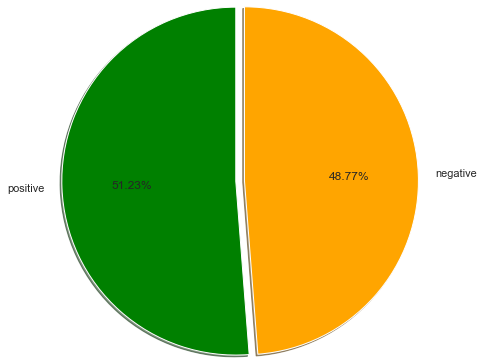

In [42]:
#https://stackoverflow.com/questions/39969089/how-to-create-pie-chart
#https://stackoverflow.com/questions/19852215/how-to-add-a-legend-to-matplotlib-pie-chart
label = ['positive','negative']
colors = ['green', 'orange'] 
plt.pie(twitter_df['polarity'].value_counts(),labels=label,colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), autopct = '%1.2f%%',radius=2) 
plt.show()

/Users/yash/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


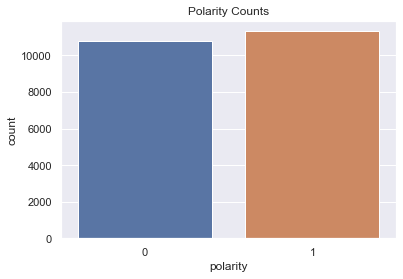

In [43]:
#https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/
# Visualize the polarity counts
sns.countplot(twitter_df["polarity"])
plt.title("Polarity Counts")
plt.show()

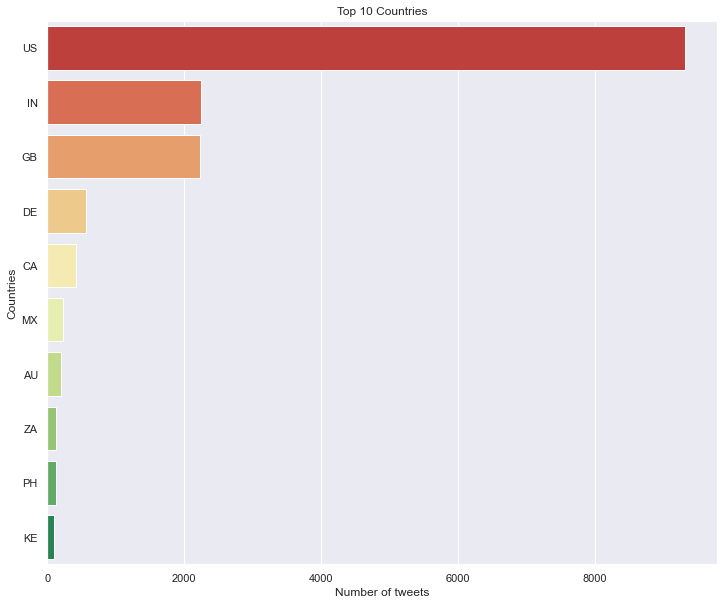

In [44]:
# Exclude unknown countries
countries_list = twitter_df[twitter_df.user_location_cleaned!='None']
# Select the top 10 countries
top_countries_list = countries_list["user_location_cleaned"].value_counts(sort=True).head(10)
# Visualize the top 10 countries
plt.figure(figsize=(12,10))
sns.barplot(y=top_countries_list.index,x=top_countries_list, orient="h", palette="RdYlGn")
plt.xlabel("Number of tweets")
plt.ylabel("Countries")
plt.title("Top 10 Countries")
plt.show()

/Users/yash/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


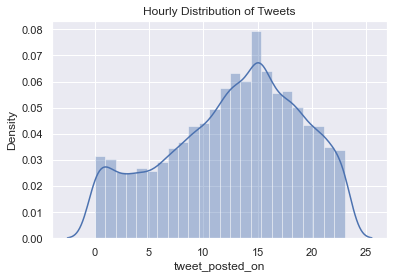

In [45]:
#https://seaborn.pydata.org/generated/seaborn.distplot.html
# Set the seaborn style
sns.set()
#converting 'date' column to a datetime datatype
twitter_df['tweet_posted_on'] = pd.to_datetime(twitter_df['tweet_posted_on'])
# Plot the histogram of hours
sns.distplot(twitter_df["tweet_posted_on"].dt.hour, bins=24)
plt.title("Hourly Distribution of Tweets")
plt.show()

In [46]:
#Convert 'tweet_posted_on' datatype from object to datetime format
twitter_df['date'] = pd.to_datetime(twitter_df['tweet_posted_on']).dt.date

Text(0.5, 1.0, 'Tweets polarity on each day')

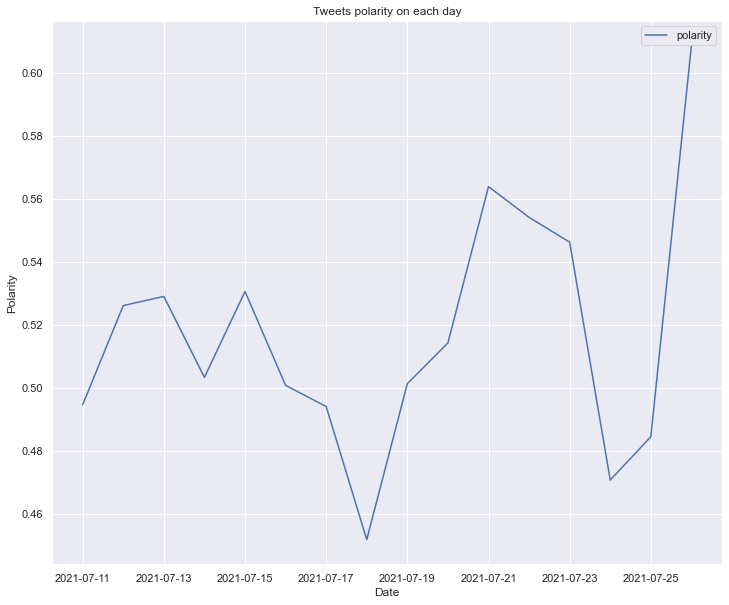

In [47]:
#Visualize the polarity of tweets each day
plt.figure(figsize=(12,10))
twitter_df.groupby(by='date')['polarity'].mean().plot(legend=True)
plt.xlabel("Date")
plt.ylabel("Polarity")
plt.title("Tweets polarity on each day")

<Figure size 3600x2400 with 0 Axes>

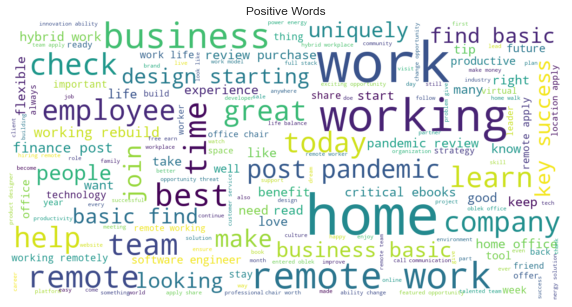

In [48]:
#https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
positive_words =' '.join([word for word in twitter_df['cleaned_tweets'][twitter_df['polarity'] == 1]])
wordcloud = WordCloud( background_color='white',
        stopwords=stopwords.words('english'),
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Positive Words")
plt.show()

<Figure size 3600x2400 with 0 Axes>

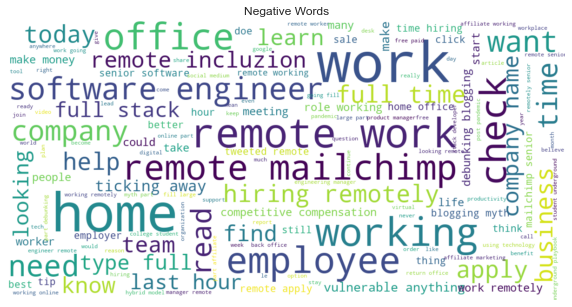

In [49]:
negative_words =' '.join([text for text in twitter_df['cleaned_tweets'][twitter_df['polarity'] == 0]])
wordcloud = WordCloud( background_color='white',
        stopwords=stopwords.words('english'),
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(negative_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Negative Words")
plt.show()

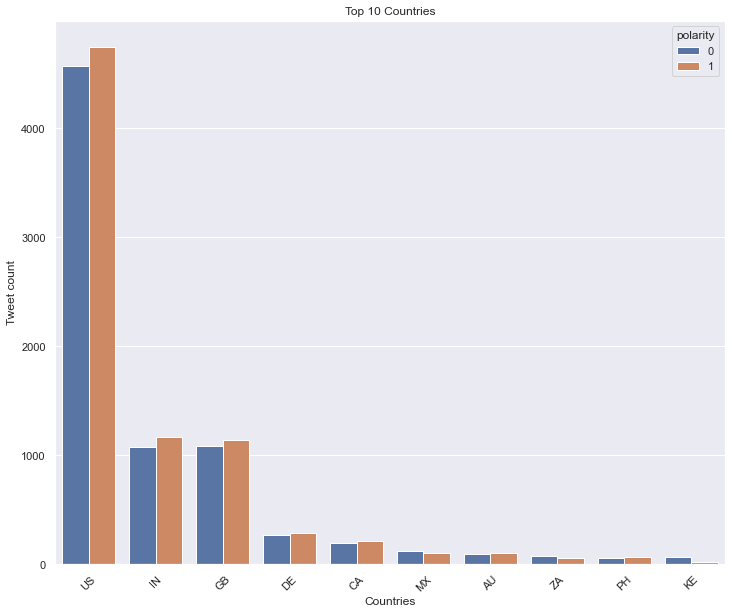

In [50]:
# Create a mask for top 1 countries (by tweets count)
mask = twitter_df["user_location_cleaned"].isin(top_countries_list.index[:10]).values

# Create a new DataFrame only includes top10 country
top_10 = twitter_df.iloc[mask,:]

# Visualize the top 20 countries
plt.figure(figsize=(12,10))
sns.countplot(x="user_location_cleaned", hue="polarity", data=top_10, order=top_10["user_location_cleaned"].value_counts().index)
plt.xlabel("Countries")
locs, labels = plt.xticks()
plt.xticks(locs, top_countries_list.index)
plt.xticks(rotation=45)
plt.ylabel("Tweet count")
plt.title("Top 10 Countries")
plt.show()

In [51]:
def list_hashtag(tweet):
    prob = tweet.replace("#remotework","")
    prob = prob.replace("#workfromhome","")
    prob = prob.replace("#WorkFromHome","")
    prob = prob.replace("#RemoteWork","")
    prob = prob.replace("#wfh","")
    prob = prob.replace("#WFH","")
    prob = prob.replace("#Hiring","")
    prob = prob.replace("#workathome","")
    prob = prob.replace("#remotejob","")
    return prob

In [52]:
#https://stackoverflow.com/questions/50582305/extract-and-count-unique-hashtags-per-row-from-a-pandas-dataframe
prob_1 = twitter_df['tweets'].map(list_hashtag).str.extractall(r'(\#\w+)').reset_index(level=0).drop_duplicates()[0]

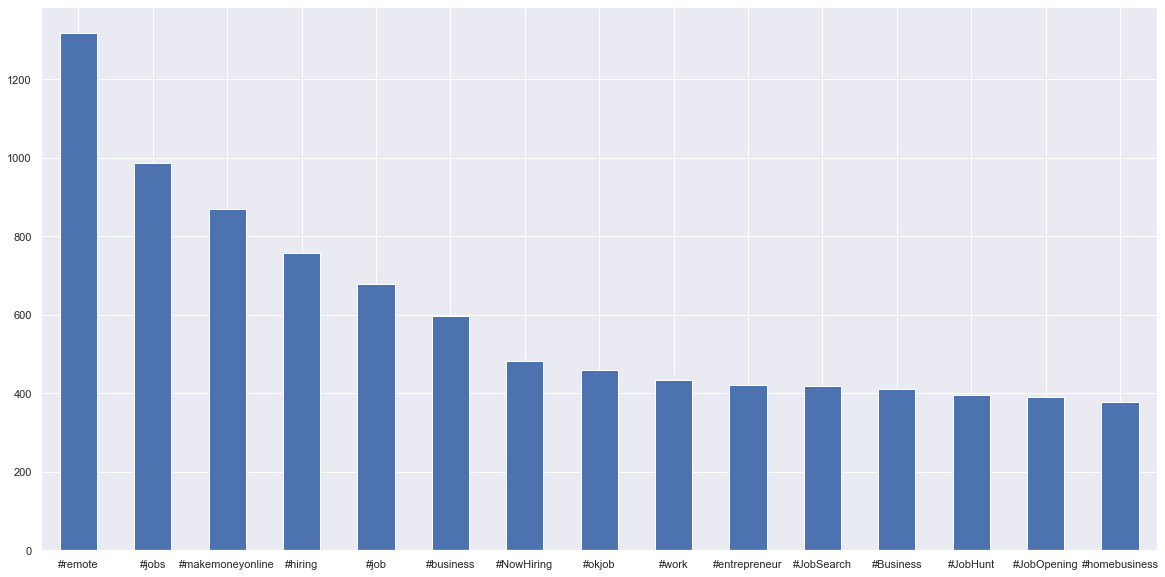

In [53]:
#visualize most frequent hashtags
plt.figure(figsize=(20,10))
prob_1.value_counts(sort=True).head(15).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()